In [1]:
%pylab inline
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function for adding an sphere
def addSphere (mat3d, bulk_size, sph_pos, sph_r, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    sph_pos_int = np.empty(3, dtype=int)
    
    sph_pos_int[0]=int(round((sph_pos[0]+bulk_size[0]/2)/dbulk[0]))
    sph_pos_int[1]=int(round((sph_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    sph_pos_int[2]=int(round((sph_pos[2])/dbulk[2]))
    sph_r_int=sph_r/dbulk[0]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if (sqrt((x - sph_pos_int[0])**2  + (y - sph_pos_int[1])**2 + (z - sph_pos_int[2])**2) <= sph_r_int):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [3]:
# Funciotn for adding a cylinder in the XY plane
def addXYCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_z, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_z_int=cyl_z/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (y - cyl_pos_int[1])**2) <= cyl_r_int and abs(z - cyl_pos_int[1]) <= cyl_z_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [4]:
# Funciotn for adding a cylinder in the XZ plane
def addXZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_y_int=cyl_y/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(y - cyl_pos_int[1]) <= cyl_y_int/2)):
                    mat3d[x,y,z] = desc                  
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [5]:
# Funciotn for adding a cylinder in the YZ plane
def addYZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_y_int=cyl_y/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((y - cyl_pos_int[1])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(x - cyl_pos_int[0]) <= cyl_y_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [24]:
def XYRotate (inMatrix, angle):
    size_z = inMatrix.shape[2]
    rotMatrix = inMatrix
    for z_depth in range(size_z):
         rotMatrix[:,:,z_depth] = ndimage.rotate(inMatrix[:,:,z_depth], angle, reshape=False, order=0, cval=1)
    rotMatrix=np.ceil(rotMatrix)
    return rotMatrix

In [7]:
# 3D bulk size info
grid_size = 4
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
print(size_lat*size_lat*size_depth)

128000


In [8]:
# Add spheres

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d_size = [4*thickness, 4*thickness, thickness]

sph_pos1 = (-3.5, 0, 1.35)
sph_pos2 = (-2, 0, 1.35)
#sph_pos3 = (-1, -sqrt(3), 1.15)
#sph_pos4 = (sqrt(15), 1, 1.15)
#sph_pos5 = (sqrt(15), -1, 1.15)

addSphere(bulk3d, bulk3d_size, sph_pos1, 0.585, 2)
addSphere(bulk3d, bulk3d_size, sph_pos2, 0.6, 2)
#addSphere(bulk3dSph, bulk3d_size, sph_pos3, 0.6, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos4, 0.5, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos5, 0.5, 2)

57 128000
57 128000


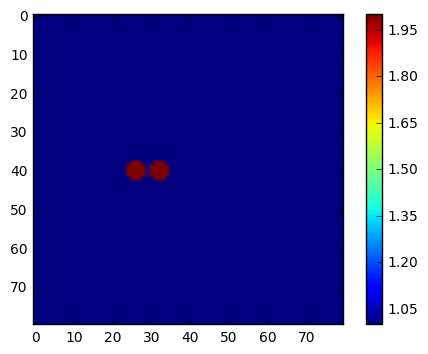

In [9]:
plt.imshow(bulk3d[:,:,5].T,vmin=1)
cbar = plt.colorbar()

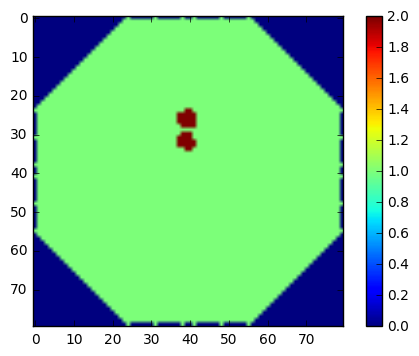

In [11]:
bulk3dRot = XYRotate(bulk3d, 45)

plt.imshow(bulk3dRot[:,:,5].T)
cbar = plt.colorbar()

In [23]:
# Add cylinders

bulk3dCyl = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3dCyl_size = [4*thickness, 4*thickness, thickness]

cyl_pos1 = (-3.5, 0, 1.)
cyl_pos2 = (-1.5, 0, 1.)
cyl_pos3 = (0.5, 0, 1.)

addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos1, 0.5, 4, 2)
addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos2, 0.5, 4, 2)
addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos3, 0.5, 4, 2)

441 250000
441 250000
441 250000


/home/nicolas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


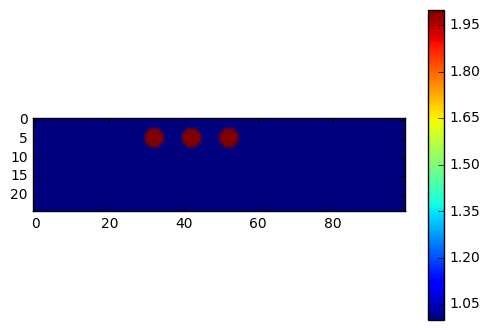

In [24]:
plt.imshow(bulk3dCyl[:,size_lat/2,:].T,vmin=1)
cbar = plt.colorbar()

In [25]:
# Flatten matrix and save
bulk_flat = bulk3dCyl.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)

filenameCyl = "3Dbulk-cyl-z1"
#with open(filenameCyl,"wb") as f:
#                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 250000)


In [9]:
# Flatten matrix and save
bulk_flat = bulk3dSph.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)

filenameSph = "3Dbulk-sph-gs1"
#with open(filenameSph,"wb") as f:
#                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 2000)


In [10]:
# Generate and save homogeneous matrix for background
bulk_flat_back = np.full((size_lat,size_lat,size_depth),1,dtype=int).reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat_back.shape)

filename_back = "3Dbulk-fondo-gs1"
#with open(filename_back,"wb") as f:
#                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

(1, 2000)


In [17]:
# Full simulation of whole field reflectance experiment
# 3D bulk size info
grid_size = 4
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
print(size_lat*size_lat*size_depth)

# Add spheres

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d_size = [4*thickness, 4*thickness, thickness]

sph_pos1 = (-4.5, 0, 1.5)
sph_pos2 = (1.5, -2.0, 1.15)
cyl_pos1 = (0.5, 3.5, 1.)


addSphere(bulk3d, bulk3d_size, sph_pos1, 0.5, 2)
addSphere(bulk3d, bulk3d_size, sph_pos2, 0.6, 2)
addYZCyl(bulk3d, bulk3d_size, cyl_pos1, 0.3, 4, 3)

128000
33 128000
57 128000
85 128000


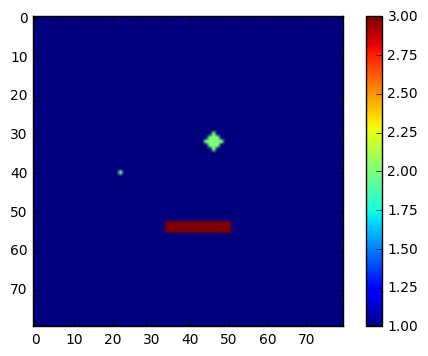

In [18]:
bulk3dTemp = XYRotate(bulk3d, 0)
plt.imshow(bulk3dTemp[:,:,4].T,vmin=1)
cbar = plt.colorbar()

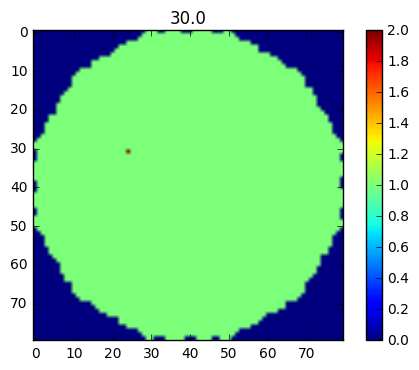

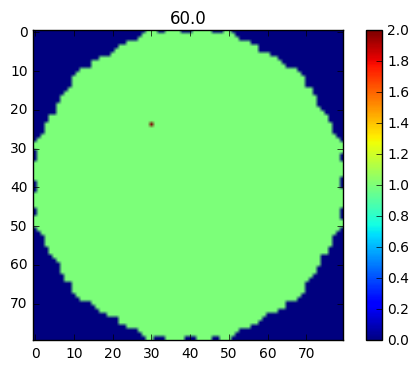

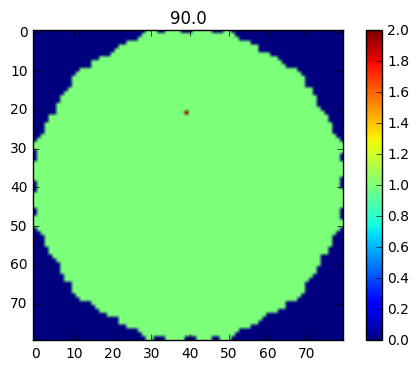

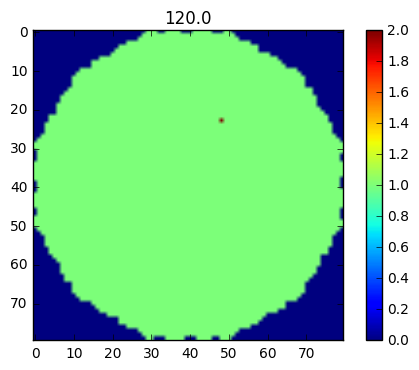

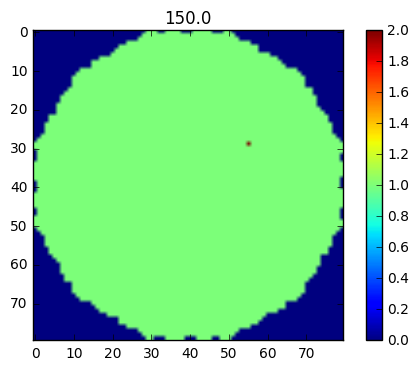

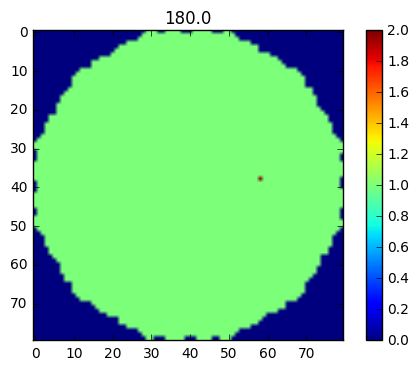

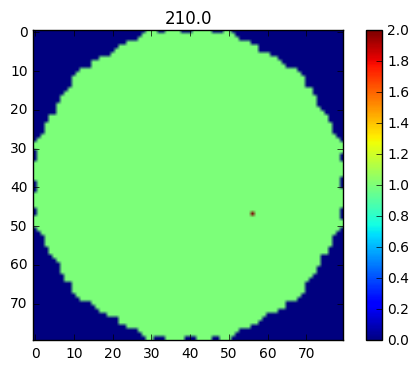

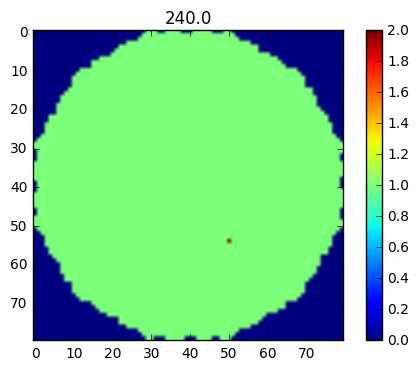

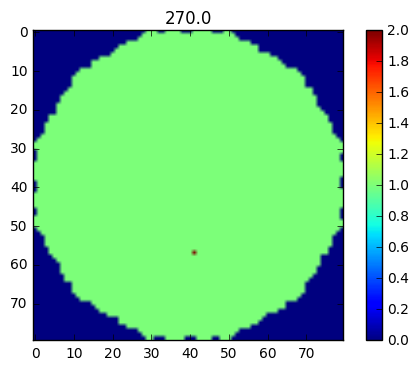

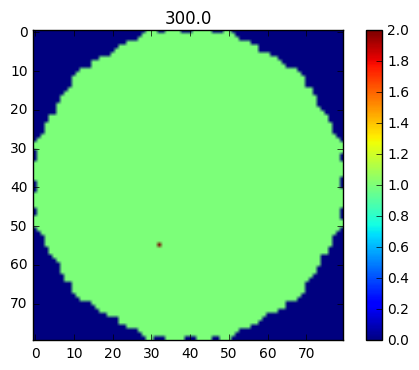

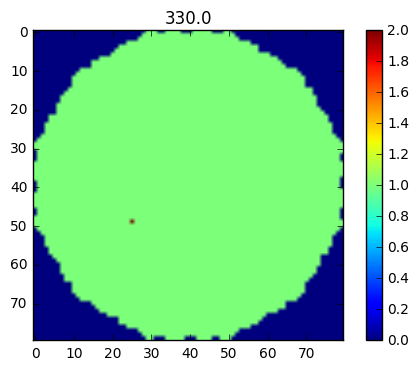

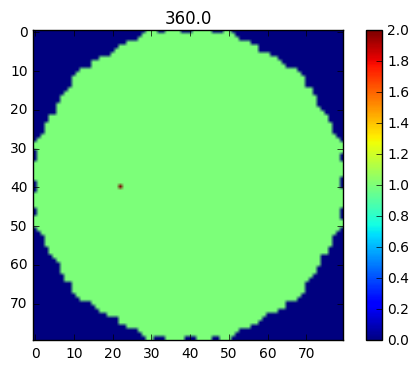

In [23]:
# Rotate the image to perform the normalization and the scanning
numRots=12
angle = 0
for i in range (numRots):
    bulk3dRot = np.full((size_lat,size_lat,size_depth),1,dtype=int)
    angleRot = 360/numRots
    angle += angleRot
    bulk3dRot = XYRotate(bulk3d, angleRot)
    fig = plt.figure()
    plt.imshow(bulk3dRot[:,:,8].T,vmin=0)
    plt.title(str(angle))
    cbar = plt.colorbar()
    filename = "/home/nicolas/CUDAMCFL/BulkDesc/3Dbulk-wfr-a"+ str(round(angle))
    #with open(filename,"wb") as f:
        #savetxt(f, bulk3dRot.T.reshape(1,size_lat*size_lat*size_depth), fmt='%i', delimiter=" ")        